# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [3]:
from unityagents import UnityEnvironment
import numpy as np


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0


Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0


Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [15]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:

# adding the model 
import torch
import matplotlib.pyplot as plt
from collections import deque
from p3_collab_compet.ddpg_agent import Agent

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=10)


num_episodes = 5000

def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    mean_scores = []                 # list containing running mean scores from 100 episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action1 = agent.act(state[0])
            action2 = agent.act(state[1])
            action = np.concatenate((action1, action2), axis=0)
            action = np.clip(action, -1, 1)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)

            state = next_state
            score += reward
            if np.any(done):
                break
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        mean_scores.append(np.mean(scores_deque))  # save running mean
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'Tennis_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'Tennis_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))

        if np.mean(scores_deque) > 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode-100,
                                                                                         np.mean(scores_deque)))
            break

    return scores, mean_scores


scores, mean_scores = ddpg(n_episodes=num_episodes, max_t=1000)



Episode 3	Average Score: 0.0000

Episode 4	Average Score: 0.0000

Episode 5	Average Score: 0.0000

Episode 7	Average Score: 0.0000

Episode 9	Average Score: 0.0000

Episode 11	Average Score: 0.0000

Episode 13	Average Score: 0.0000

Episode 15	Average Score: 0.0000

Episode 17	Average Score: 0.0000

Episode 19	Average Score: 0.0000

Episode 21	Average Score: 0.0000

Episode 23	Average Score: 0.0000

Episode 25	Average Score: 0.0000

Episode 27	Average Score: 0.0000

Episode 29	Average Score: 0.0000

Episode 31	Average Score: 0.0000

Episode 33	Average Score: 0.0000

Episode 35	Average Score: 0.0000

Episode 37	Average Score: 0.0000

Episode 39	Average Score: 0.0000

Episode 41	Average Score: 0.0000

Episode 43	Average Score: 0.0000

Episode 45	Average Score: 0.0000

Episode 47	Average Score: 0.0000

Episode 49	Average Score: 0.0000

Episode 51	Average Score: 0.0000

Episode 53	Average Score: 0.0000

Episode 55	Average Score: 0.0000

Episode 57	Average Score: 0.0000

Episode 59	Average Score: 0.0000

Episode 61	Average Score: 0.0000

Episode 63	Average Score: 0.0000

Episode 65	Average Score: 0.0000

Episode 67	Average Score: 0.0000

Episode 69	Average Score: 0.0000

Episode 71	Average Score: 0.0000

Episode 73	Average Score: 0.0000

Episode 75	Average Score: 0.0000

Episode 77	Average Score: 0.0000

Episode 79	Average Score: 0.0000

Episode 81	Average Score: 0.0000

Episode 83	Average Score: 0.0000

Episode 85	Average Score: 0.0000

Episode 87	Average Score: 0.0000

Episode 89	Average Score: 0.0000

Episode 91	Average Score: 0.0000

Episode 93	Average Score: 0.0000

Episode 95	Average Score: 0.0000

Episode 97	Average Score: 0.0000

Episode 99	Average Score: 0.0000

Episode 100	Average Score: 0.0000
Episode 101	Average Score: 0.0000

Episode 103	Average Score: 0.0000

Episode 105	Average Score: 0.0000

Episode 106	Average Score: 0.0000

Episode 108	Average Score: 0.0010

Episode 110	Average Score: 0.0010

Episode 112	Average Score: 0.0010

Episode 114	Average Score: 0.0010

Episode 116	Average Score: 0.0010

Episode 118	Average Score: 0.0010

Episode 120	Average Score: 0.0010

Episode 122	Average Score: 0.0010

Episode 124	Average Score: 0.0010

Episode 126	Average Score: 0.0010

Episode 128	Average Score: 0.0010

Episode 130	Average Score: 0.0010

Episode 132	Average Score: 0.0010

Episode 134	Average Score: 0.0010

Episode 136	Average Score: 0.0010

Episode 138	Average Score: 0.0010

Episode 140	Average Score: 0.0010

Episode 142	Average Score: 0.0010

Episode 144	Average Score: 0.0010

Episode 146	Average Score: 0.0010

Episode 148	Average Score: 0.0010

Episode 150	Average Score: 0.0010

Episode 152	Average Score: 0.0010

Episode 154	Average Score: 0.0010

Episode 156	Average Score: 0.0010

Episode 158	Average Score: 0.0010

Episode 160	Average Score: 0.0010

Episode 162	Average Score: 0.0010

Episode 164	Average Score: 0.0010

Episode 166	Average Score: 0.0010

Episode 168	Average Score: 0.0010

Episode 170	Average Score: 0.0010

Episode 172	Average Score: 0.0010

Episode 174	Average Score: 0.0010

Episode 176	Average Score: 0.0010

Episode 178	Average Score: 0.0010

Episode 180	Average Score: 0.0010

Episode 182	Average Score: 0.0010

Episode 184	Average Score: 0.0010

Episode 186	Average Score: 0.0010

Episode 188	Average Score: 0.0010

Episode 190	Average Score: 0.0010

Episode 192	Average Score: 0.0010

Episode 194	Average Score: 0.0010

Episode 196	Average Score: 0.0010

Episode 198	Average Score: 0.0010

Episode 200	Average Score: 0.0010


Episode 202	Average Score: 0.0010

Episode 204	Average Score: 0.0010

Episode 206	Average Score: 0.0010

Episode 208	Average Score: 0.0000

Episode 210	Average Score: 0.0000

Episode 212	Average Score: 0.0000

Episode 214	Average Score: 0.0000

Episode 216	Average Score: 0.0000

Episode 218	Average Score: 0.0000

Episode 220	Average Score: 0.0000

Episode 221	Average Score: 0.0000

Episode 222	Average Score: 0.0000

Episode 224	Average Score: 0.0000

Episode 226	Average Score: 0.0000

Episode 228	Average Score: 0.0000

Episode 230	Average Score: 0.0000

Episode 232	Average Score: 0.0000

Episode 234	Average Score: 0.0000

Episode 236	Average Score: 0.0000

Episode 238	Average Score: 0.0000

Episode 240	Average Score: 0.0000

Episode 242	Average Score: 0.0000

Episode 244	Average Score: 0.0000

Episode 246	Average Score: 0.0000

Episode 248	Average Score: 0.0000

Episode 250	Average Score: 0.0000

Episode 252	Average Score: 0.0000

Episode 254	Average Score: 0.0000

Episode 256	Average Score: 0.0000

Episode 258	Average Score: 0.0000

Episode 260	Average Score: 0.0000

Episode 262	Average Score: 0.0000

Episode 264	Average Score: 0.0000

Episode 266	Average Score: 0.0000

Episode 268	Average Score: 0.0000

Episode 270	Average Score: 0.0000

Episode 272	Average Score: 0.0000

Episode 274	Average Score: 0.0000

Episode 276	Average Score: 0.0000

Episode 278	Average Score: 0.0000

Episode 279	Average Score: 0.0000

Episode 281	Average Score: 0.0000

Episode 282	Average Score: 0.0000

Episode 284	Average Score: 0.0000

Episode 286	Average Score: 0.0000

Episode 288	Average Score: 0.0000

Episode 290	Average Score: 0.0000

Episode 292	Average Score: 0.0000

Episode 294	Average Score: 0.0000

Episode 296	Average Score: 0.0000

Episode 298	Average Score: 0.0000

Episode 300	Average Score: 0.0000


Episode 302	Average Score: 0.0000

Episode 304	Average Score: 0.0000

Episode 306	Average Score: 0.0000

Episode 308	Average Score: 0.0000

Episode 310	Average Score: 0.0000

Episode 312	Average Score: 0.0000

Episode 314	Average Score: 0.0000

Episode 316	Average Score: 0.0000

Episode 318	Average Score: 0.0000

Episode 320	Average Score: 0.0000

Episode 322	Average Score: 0.0000

Episode 324	Average Score: 0.0000

Episode 326	Average Score: 0.0000

Episode 328	Average Score: 0.0000

Episode 330	Average Score: 0.0000

Episode 332	Average Score: 0.0000

Episode 334	Average Score: 0.0000

Episode 336	Average Score: 0.0000

Episode 338	Average Score: 0.0000

Episode 340	Average Score: 0.0000

Episode 342	Average Score: 0.0000

Episode 344	Average Score: 0.0000

Episode 346	Average Score: 0.0000

Episode 348	Average Score: 0.0000

Episode 350	Average Score: 0.0000

Episode 352	Average Score: 0.0000

Episode 354	Average Score: 0.0000

Episode 356	Average Score: 0.0000

Episode 358	Average Score: 0.0000

Episode 360	Average Score: 0.0000

Episode 362	Average Score: 0.0000

Episode 364	Average Score: 0.0000

Episode 366	Average Score: 0.0000

Episode 368	Average Score: 0.0000

Episode 370	Average Score: 0.0000

Episode 372	Average Score: 0.0000

Episode 374	Average Score: 0.0000

Episode 376	Average Score: 0.0000

Episode 378	Average Score: 0.0000

Episode 380	Average Score: 0.0000

Episode 382	Average Score: 0.0000

Episode 384	Average Score: 0.0000

Episode 386	Average Score: 0.0000

Episode 388	Average Score: 0.0000

Episode 390	Average Score: 0.0000

Episode 392	Average Score: 0.0000

Episode 394	Average Score: 0.0000

Episode 396	Average Score: 0.0000

Episode 398	Average Score: 0.0000

Episode 400	Average Score: 0.0000


Episode 402	Average Score: 0.0000

Episode 404	Average Score: 0.0000

Episode 406	Average Score: 0.0000

Episode 408	Average Score: 0.0000

Episode 410	Average Score: 0.0000

Episode 412	Average Score: 0.0000

Episode 414	Average Score: 0.0000

Episode 416	Average Score: 0.0000

Episode 418	Average Score: 0.0000

Episode 420	Average Score: 0.0000

Episode 422	Average Score: 0.0000

Episode 424	Average Score: 0.0000

Episode 426	Average Score: 0.0000

Episode 428	Average Score: 0.0000

Episode 430	Average Score: 0.0000

Episode 432	Average Score: 0.0000

Episode 434	Average Score: 0.0000

Episode 436	Average Score: 0.0000

Episode 438	Average Score: 0.0000

Episode 440	Average Score: 0.0000

Episode 442	Average Score: 0.0000

Episode 444	Average Score: 0.0000

Episode 446	Average Score: 0.0000

Episode 448	Average Score: 0.0000

Episode 450	Average Score: 0.0000

Episode 452	Average Score: 0.0000

Episode 454	Average Score: 0.0000

Episode 456	Average Score: 0.0000

Episode 458	Average Score: 0.0000

Episode 460	Average Score: 0.0000

Episode 462	Average Score: 0.0000

Episode 464	Average Score: 0.0000

Episode 466	Average Score: 0.0000

Episode 468	Average Score: 0.0000

Episode 470	Average Score: 0.0000

Episode 472	Average Score: 0.0000

Episode 474	Average Score: 0.0000

Episode 476	Average Score: 0.0000

Episode 478	Average Score: 0.0000

Episode 480	Average Score: 0.0000

Episode 482	Average Score: 0.0000

Episode 484	Average Score: 0.0000

Episode 486	Average Score: 0.0000

Episode 488	Average Score: 0.0000

Episode 490	Average Score: 0.0000

Episode 492	Average Score: 0.0000

Episode 494	Average Score: 0.0000

Episode 496	Average Score: 0.0000

Episode 498	Average Score: 0.0000

Episode 500	Average Score: 0.0000


Episode 502	Average Score: 0.0000

Episode 504	Average Score: 0.0000

Episode 506	Average Score: 0.0000

Episode 508	Average Score: 0.0000

Episode 509	Average Score: 0.0000

Episode 511	Average Score: 0.0000

Episode 513	Average Score: 0.0000

Episode 515	Average Score: 0.0000

Episode 517	Average Score: 0.0000

Episode 518	Average Score: 0.0000

Episode 519	Average Score: 0.0000

Episode 521	Average Score: 0.0000

Episode 522	Average Score: 0.0000

Episode 524	Average Score: 0.0000

Episode 526	Average Score: 0.0000

Episode 528	Average Score: 0.0000

Episode 530	Average Score: 0.0000

Episode 532	Average Score: 0.0000

Episode 534	Average Score: 0.0000

Episode 536	Average Score: 0.0000

Episode 538	Average Score: 0.0000

Episode 540	Average Score: 0.0000

Episode 542	Average Score: 0.0000

Episode 544	Average Score: 0.0000

Episode 546	Average Score: 0.0000

Episode 548	Average Score: 0.0000

Episode 550	Average Score: 0.0000

Episode 552	Average Score: 0.0000

Episode 554	Average Score: 0.0000

Episode 556	Average Score: 0.0000

Episode 558	Average Score: 0.0000

Episode 560	Average Score: 0.0000

Episode 562	Average Score: 0.0000

Episode 564	Average Score: 0.0000

Episode 566	Average Score: 0.0000

Episode 568	Average Score: 0.0000

Episode 570	Average Score: 0.0000

Episode 572	Average Score: 0.0000

Episode 574	Average Score: 0.0000

Episode 576	Average Score: 0.0000

Episode 577	Average Score: 0.0000

Episode 579	Average Score: 0.0010

Episode 581	Average Score: 0.0010

Episode 583	Average Score: 0.0010

Episode 585	Average Score: 0.0010

Episode 587	Average Score: 0.0010

Episode 589	Average Score: 0.0010

Episode 591	Average Score: 0.0010

Episode 593	Average Score: 0.0010

Episode 595	Average Score: 0.0010

Episode 597	Average Score: 0.0010

Episode 599	Average Score: 0.0010

Episode 600	Average Score: 0.0010
Episode 601	Average Score: 0.0010

Episode 602	Average Score: 0.0010

Episode 604	Average Score: 0.0010

Episode 606	Average Score: 0.0010

Episode 608	Average Score: 0.0010

Episode 610	Average Score: 0.0010

Episode 612	Average Score: 0.0010

Episode 613	Average Score: 0.0010

Episode 615	Average Score: 0.0019

Episode 617	Average Score: 0.0019

Episode 619	Average Score: 0.0019

Episode 621	Average Score: 0.0019

Episode 623	Average Score: 0.0019

Episode 625	Average Score: 0.0019

Episode 627	Average Score: 0.0019

Episode 629	Average Score: 0.0019

Episode 630	Average Score: 0.0019

Episode 632	Average Score: 0.0029

Episode 634	Average Score: 0.0029

Episode 636	Average Score: 0.0029

Episode 638	Average Score: 0.0029

Episode 640	Average Score: 0.0029

Episode 641	Average Score: 0.0029

Episode 643	Average Score: 0.0038

Episode 645	Average Score: 0.0038

Episode 647	Average Score: 0.0038

Episode 649	Average Score: 0.0038

Episode 651	Average Score: 0.0038

Episode 653	Average Score: 0.0038

Episode 655	Average Score: 0.0038

Episode 657	Average Score: 0.0038

Episode 659	Average Score: 0.0038

Episode 661	Average Score: 0.0038

Episode 663	Average Score: 0.0038

Episode 665	Average Score: 0.0038

Episode 667	Average Score: 0.0038

Episode 669	Average Score: 0.0038

Episode 671	Average Score: 0.0038

Episode 673	Average Score: 0.0038

Episode 675	Average Score: 0.0038

Episode 677	Average Score: 0.0038

Episode 679	Average Score: 0.0028

Episode 680	Average Score: 0.0028

Episode 682	Average Score: 0.0028

Episode 683	Average Score: 0.0028

Episode 685	Average Score: 0.0038

Episode 687	Average Score: 0.0038

Episode 689	Average Score: 0.0038

Episode 691	Average Score: 0.0038

Episode 693	Average Score: 0.0038

Episode 694	Average Score: 0.0038

Episode 695	Average Score: 0.0048

Episode 697	Average Score: 0.0048

Episode 699	Average Score: 0.0048

Episode 700	Average Score: 0.0048


Episode 702	Average Score: 0.0058

Episode 704	Average Score: 0.0058

Episode 706	Average Score: 0.0058

Episode 708	Average Score: 0.0058

Episode 710	Average Score: 0.0058

Episode 711	Average Score: 0.0068

Episode 713	Average Score: 0.0078

Episode 715	Average Score: 0.0069

Episode 717	Average Score: 0.0069

Episode 719	Average Score: 0.0069

Episode 721	Average Score: 0.0078

Episode 722	Average Score: 0.0087

Episode 723	Average Score: 0.0097

Episode 725	Average Score: 0.0107

Episode 727	Average Score: 0.0117

Episode 729	Average Score: 0.0117

Episode 731	Average Score: 0.0107

Episode 733	Average Score: 0.0107

Episode 735	Average Score: 0.0107

Episode 737	Average Score: 0.0107

Episode 738	Average Score: 0.0107

Episode 740	Average Score: 0.0107

Episode 741	Average Score: 0.0107

Episode 743	Average Score: 0.0098

Episode 745	Average Score: 0.0098

Episode 747	Average Score: 0.0098

Episode 749	Average Score: 0.0098

Episode 751	Average Score: 0.0098

Episode 753	Average Score: 0.0098

Episode 755	Average Score: 0.0098

Episode 757	Average Score: 0.0098

Episode 759	Average Score: 0.0098

Episode 761	Average Score: 0.0098

Episode 763	Average Score: 0.0098

Episode 765	Average Score: 0.0098

Episode 767	Average Score: 0.0098

Episode 769	Average Score: 0.0098

Episode 771	Average Score: 0.0098

Episode 773	Average Score: 0.0098

Episode 775	Average Score: 0.0098

Episode 777	Average Score: 0.0098

Episode 779	Average Score: 0.0098

Episode 781	Average Score: 0.0098

Episode 783	Average Score: 0.0098

Episode 785	Average Score: 0.0088

Episode 787	Average Score: 0.0088

Episode 789	Average Score: 0.0088

Episode 791	Average Score: 0.0088

Episode 793	Average Score: 0.0088

Episode 795	Average Score: 0.0078

Episode 797	Average Score: 0.0078

Episode 798	Average Score: 0.0078

Episode 800	Average Score: 0.0088


Episode 801	Average Score: 0.0078

Episode 803	Average Score: 0.0078

Episode 805	Average Score: 0.0078

Episode 807	Average Score: 0.0078

Episode 809	Average Score: 0.0078

Episode 811	Average Score: 0.0068

Episode 813	Average Score: 0.0058

Episode 814	Average Score: 0.0058

Episode 816	Average Score: 0.0058

Episode 818	Average Score: 0.0058

Episode 820	Average Score: 0.0049

Episode 822	Average Score: 0.0040

Episode 824	Average Score: 0.0020

Episode 826	Average Score: 0.0010

Episode 828	Average Score: 0.0010

Episode 829	Average Score: 0.0010

Episode 831	Average Score: 0.0019

Episode 833	Average Score: 0.0019

Episode 835	Average Score: 0.0019

Episode 837	Average Score: 0.0019

Episode 839	Average Score: 0.0019

Episode 841	Average Score: 0.0019

Episode 843	Average Score: 0.0029

Episode 845	Average Score: 0.0029

Episode 847	Average Score: 0.0029

Episode 849	Average Score: 0.0029

Episode 851	Average Score: 0.0029

Episode 852	Average Score: 0.0029

Episode 854	Average Score: 0.0038

Episode 856	Average Score: 0.0038

Episode 857	Average Score: 0.0038

Episode 858	Average Score: 0.0048

Episode 860	Average Score: 0.0058

Episode 862	Average Score: 0.0068

Episode 864	Average Score: 0.0068

Episode 866	Average Score: 0.0068

Episode 868	Average Score: 0.0068

Episode 870	Average Score: 0.0068

Episode 871	Average Score: 0.0068

Episode 873	Average Score: 0.0068

Episode 875	Average Score: 0.0068

Episode 877	Average Score: 0.0068

Episode 879	Average Score: 0.0068

Episode 881	Average Score: 0.0068

Episode 883	Average Score: 0.0077

Episode 885	Average Score: 0.0077

Episode 887	Average Score: 0.0077

Episode 889	Average Score: 0.0077

Episode 891	Average Score: 0.0077

Episode 893	Average Score: 0.0077

Episode 895	Average Score: 0.0077

Episode 896	Average Score: 0.0086

Episode 897	Average Score: 0.0096

Episode 898	Average Score: 0.0105

Episode 900	Average Score: 0.0105


Episode 901	Average Score: 0.0105

Episode 903	Average Score: 0.0114

Episode 904	Average Score: 0.0114

Episode 906	Average Score: 0.0123

Episode 907	Average Score: 0.0123

Episode 909	Average Score: 0.0133

Episode 910	Average Score: 0.0133

Episode 912	Average Score: 0.0143

Episode 913	Average Score: 0.0152

Episode 915	Average Score: 0.0162

Episode 917	Average Score: 0.0172

Episode 919	Average Score: 0.0172

Episode 921	Average Score: 0.0172

Episode 923	Average Score: 0.0172

Episode 924	Average Score: 0.0172

Episode 926	Average Score: 0.0172

Episode 928	Average Score: 0.0182

Episode 930	Average Score: 0.0173

Episode 932	Average Score: 0.0173

Episode 934	Average Score: 0.0173

Episode 935	Average Score: 0.0173

Episode 937	Average Score: 0.0183

Episode 939	Average Score: 0.0183

Episode 940	Average Score: 0.0183

Episode 941	Average Score: 0.0193

Episode 943	Average Score: 0.0193

Episode 945	Average Score: 0.0193

Episode 947	Average Score: 0.0203

Episode 949	Average Score: 0.0203

Episode 951	Average Score: 0.0203

Episode 953	Average Score: 0.0194

Episode 955	Average Score: 0.0194

Episode 957	Average Score: 0.0194

Episode 958	Average Score: 0.0184

Episode 960	Average Score: 0.0184

Episode 961	Average Score: 0.0174

Episode 962	Average Score: 0.0194

Episode 964	Average Score: 0.0204

Episode 965	Average Score: 0.0214

Episode 967	Average Score: 0.0234

Episode 969	Average Score: 0.0234

Episode 970	Average Score: 0.0244

Episode 972	Average Score: 0.0254

Episode 974	Average Score: 0.0254

Episode 975	Average Score: 0.0254

Episode 977	Average Score: 0.0264

Episode 978	Average Score: 0.0264

Episode 979	Average Score: 0.0264

Episode 981	Average Score: 0.0264

Episode 983	Average Score: 0.0255

Episode 985	Average Score: 0.0255

Episode 986	Average Score: 0.0255

Episode 987	Average Score: 0.0265

Episode 989	Average Score: 0.0285

Episode 990	Average Score: 0.0285

Episode 992	Average Score: 0.0295

Episode 994	Average Score: 0.0295

Episode 996	Average Score: 0.0286

Episode 998	Average Score: 0.0267

Episode 1000	Average Score: 0.0257


Episode 1002	Average Score: 0.0248

Episode 1004	Average Score: 0.0248

Episode 1006	Average Score: 0.0239

Episode 1007	Average Score: 0.0239

Episode 1009	Average Score: 0.0239

Episode 1010	Average Score: 0.0239

Episode 1012	Average Score: 0.0259

Episode 1014	Average Score: 0.0240

Episode 1016	Average Score: 0.0230

Episode 1018	Average Score: 0.0230

Episode 1020	Average Score: 0.0230

Episode 1021	Average Score: 0.0230

Episode 1023	Average Score: 0.0240

Episode 1025	Average Score: 0.0240

Episode 1027	Average Score: 0.0230

Episode 1029	Average Score: 0.0230

Episode 1031	Average Score: 0.0230

Episode 1033	Average Score: 0.0230

Episode 1034	Average Score: 0.0230

Episode 1036	Average Score: 0.0230

Episode 1038	Average Score: 0.0240

Episode 1040	Average Score: 0.0240

Episode 1042	Average Score: 0.0230

Episode 1044	Average Score: 0.0230

Episode 1046	Average Score: 0.0220

Episode 1048	Average Score: 0.0220

Episode 1050	Average Score: 0.0230

Episode 1052	Average Score: 0.0230

Episode 1054	Average Score: 0.0230

Episode 1056	Average Score: 0.0230

Episode 1058	Average Score: 0.0240

Episode 1060	Average Score: 0.0230

Episode 1062	Average Score: 0.0210

Episode 1064	Average Score: 0.0200

Episode 1066	Average Score: 0.0170

Episode 1068	Average Score: 0.0170

Episode 1069	Average Score: 0.0170

Episode 1071	Average Score: 0.0160

Episode 1073	Average Score: 0.0160

Episode 1075	Average Score: 0.0160

Episode 1077	Average Score: 0.0150

Episode 1079	Average Score: 0.0150

Episode 1081	Average Score: 0.0150

Episode 1082	Average Score: 0.0150

Episode 1084	Average Score: 0.0160

Episode 1086	Average Score: 0.0160

Episode 1088	Average Score: 0.0130

Episode 1089	Average Score: 0.0130

Episode 1091	Average Score: 0.0130

Episode 1092	Average Score: 0.0140

Episode 1093	Average Score: 0.0180

Episode 1095	Average Score: 0.0190

Episode 1097	Average Score: 0.0190

Episode 1099	Average Score: 0.0190

Episode 1100	Average Score: 0.0190


Episode 1102	Average Score: 0.0210

Episode 1103	Average Score: 0.0210

Episode 1105	Average Score: 0.0220

Episode 1107	Average Score: 0.0230

Episode 1109	Average Score: 0.0220

Episode 1111	Average Score: 0.0190

Episode 1113	Average Score: 0.0190

Episode 1115	Average Score: 0.0190

Episode 1117	Average Score: 0.0190

Episode 1119	Average Score: 0.0190

Episode 1121	Average Score: 0.0190

Episode 1123	Average Score: 0.0180

Episode 1125	Average Score: 0.0180

Episode 1127	Average Score: 0.0180

Episode 1129	Average Score: 0.0180

Episode 1131	Average Score: 0.0180

Episode 1133	Average Score: 0.0180

Episode 1135	Average Score: 0.0170

Episode 1137	Average Score: 0.0160

Episode 1139	Average Score: 0.0160

Episode 1141	Average Score: 0.0150

Episode 1143	Average Score: 0.0150

Episode 1145	Average Score: 0.0150

Episode 1147	Average Score: 0.0150

Episode 1149	Average Score: 0.0140

Episode 1150	Average Score: 0.0140

Episode 1151	Average Score: 0.0150

Episode 1153	Average Score: 0.0160

Episode 1155	Average Score: 0.0160

Episode 1156	Average Score: 0.0160

Episode 1158	Average Score: 0.0190

Episode 1160	Average Score: 0.0190

Episode 1161	Average Score: 0.0190

Episode 1163	Average Score: 0.0200

Episode 1165	Average Score: 0.0200

Episode 1167	Average Score: 0.0200

Episode 1168	Average Score: 0.0200

Episode 1170	Average Score: 0.0199

Episode 1172	Average Score: 0.0208

Episode 1174	Average Score: 0.0208

Episode 1176	Average Score: 0.0208

Episode 1178	Average Score: 0.0208

Episode 1180	Average Score: 0.0208

Episode 1181	Average Score: 0.0208

Episode 1183	Average Score: 0.0207

Episode 1185	Average Score: 0.0207

Episode 1187	Average Score: 0.0207

Episode 1189	Average Score: 0.0207

Episode 1191	Average Score: 0.0197

Episode 1193	Average Score: 0.0147

Episode 1195	Average Score: 0.0137

Episode 1197	Average Score: 0.0137

Episode 1199	Average Score: 0.0137

Episode 1200	Average Score: 0.0137
Episode 1201	Average Score: 0.0117

Episode 1203	Average Score: 0.0127

Episode 1204	Average Score: 0.0147

Episode 1206	Average Score: 0.0147

Episode 1207	Average Score: 0.0177

Episode 1208	Average Score: 0.0187

Episode 1209	Average Score: 0.0196

Episode 1210	Average Score: 0.0205

Episode 1211	Average Score: 0.0235

Episode 1213	Average Score: 0.0255

Episode 1215	Average Score: 0.0255

Episode 1217	Average Score: 0.0255

Episode 1218	Average Score: 0.0255

Episode 1220	Average Score: 0.0265

Episode 1221	Average Score: 0.0285

Episode 1222	Average Score: 0.0295

Episode 1223	Average Score: 0.0305

Episode 1225	Average Score: 0.0314

Episode 1226	Average Score: 0.0324

Episode 1227	Average Score: 0.0333

Episode 1228	Average Score: 0.0342

Episode 1230	Average Score: 0.0352

Episode 1231	Average Score: 0.0352

Episode 1232	Average Score: 0.0361

Episode 1233	Average Score: 0.0371

Episode 1234	Average Score: 0.0380

Episode 1235	Average Score: 0.0390

Episode 1236	Average Score: 0.0399

Episode 1238	Average Score: 0.0408

Episode 1240	Average Score: 0.0417

Episode 1242	Average Score: 0.0417

Episode 1243	Average Score: 0.0427

Episode 1244	Average Score: 0.0437

Episode 1245	Average Score: 0.0447

Episode 1246	Average Score: 0.0457

Episode 1247	Average Score: 0.0467

Episode 1248	Average Score: 0.0477

Episode 1249	Average Score: 0.0486

Episode 1250	Average Score: 0.0496

Episode 1251	Average Score: 0.0495

Episode 1252	Average Score: 0.0494

Episode 1253	Average Score: 0.0503

Episode 1254	Average Score: 0.0513

Episode 1255	Average Score: 0.0523

Episode 1256	Average Score: 0.0533

Episode 1257	Average Score: 0.0493

Episode 1259	Average Score: 0.0503

Episode 1260	Average Score: 0.0512

Episode 1261	Average Score: 0.0521

Episode 1262	Average Score: 0.0520

Episode 1264	Average Score: 0.0530

Episode 1265	Average Score: 0.0540

Episode 1266	Average Score: 0.0550

Episode 1267	Average Score: 0.0560

Episode 1268	Average Score: 0.0570

Episode 1269	Average Score: 0.0571

Episode 1271	Average Score: 0.0571

Episode 1273	Average Score: 0.0580

Episode 1274	Average Score: 0.0580

Episode 1275	Average Score: 0.0590

Episode 1276	Average Score: 0.0600

Episode 1277	Average Score: 0.0600

Episode 1278	Average Score: 0.0610

Episode 1279	Average Score: 0.0619

Episode 1280	Average Score: 0.0629

Episode 1281	Average Score: 0.0639

Episode 1282	Average Score: 0.0640

Episode 1283	Average Score: 0.0649

Episode 1284	Average Score: 0.0659

Episode 1285	Average Score: 0.0669

Episode 1286	Average Score: 0.0679

Episode 1287	Average Score: 0.0688

Episode 1289	Average Score: 0.0697

Episode 1290	Average Score: 0.0706

Episode 1291	Average Score: 0.0715

Episode 1292	Average Score: 0.0724

Episode 1294	Average Score: 0.0734

Episode 1295	Average Score: 0.0744

Episode 1297	Average Score: 0.0754

Episode 1298	Average Score: 0.0763

Episode 1299	Average Score: 0.0773

Episode 1300	Average Score: 0.0783


Episode 1301	Average Score: 0.0793

Episode 1303	Average Score: 0.0793

Episode 1304	Average Score: 0.0763

Episode 1305	Average Score: 0.0762

Episode 1306	Average Score: 0.0771

Episode 1308	Average Score: 0.0740

Episode 1309	Average Score: 0.0740

Episode 1310	Average Score: 0.0741

Episode 1311	Average Score: 0.0721

Episode 1312	Average Score: 0.0711

Episode 1314	Average Score: 0.0721

Episode 1315	Average Score: 0.0731

Episode 1316	Average Score: 0.0741

Episode 1317	Average Score: 0.0751

Episode 1318	Average Score: 0.0760

Episode 1320	Average Score: 0.0759

Episode 1321	Average Score: 0.0749

Episode 1323	Average Score: 0.0739

Episode 1324	Average Score: 0.0730

Episode 1325	Average Score: 0.0740

Episode 1326	Average Score: 0.0740

Episode 1327	Average Score: 0.0741

Episode 1328	Average Score: 0.0741

Episode 1330	Average Score: 0.0740

Episode 1331	Average Score: 0.0749

Episode 1332	Average Score: 0.0749

Episode 1333	Average Score: 0.0748

Episode 1334	Average Score: 0.0749

Episode 1335	Average Score: 0.0749

Episode 1337	Average Score: 0.0741

Episode 1338	Average Score: 0.0751

Episode 1339	Average Score: 0.0752

Episode 1340	Average Score: 0.0762

Episode 1341	Average Score: 0.0772

Episode 1342	Average Score: 0.0772

Episode 1344	Average Score: 0.0762

Episode 1345	Average Score: 0.0761

Episode 1346	Average Score: 0.0761

Episode 1347	Average Score: 0.0761

Episode 1349	Average Score: 0.0752

Episode 1350	Average Score: 0.0752

Episode 1351	Average Score: 0.0753

Episode 1352	Average Score: 0.0754

Episode 1353	Average Score: 0.0755

Episode 1354	Average Score: 0.0754

Episode 1355	Average Score: 0.0754

Episode 1356	Average Score: 0.0754

Episode 1357	Average Score: 0.0763

Episode 1358	Average Score: 0.0763

Episode 1359	Average Score: 0.0763

Episode 1360	Average Score: 0.0764

Episode 1361	Average Score: 0.0764

Episode 1362	Average Score: 0.0765

Episode 1363	Average Score: 0.0764

Episode 1364	Average Score: 0.0774

Episode 1365	Average Score: 0.0764

Episode 1366	Average Score: 0.0763

Episode 1367	Average Score: 0.0763

Episode 1368	Average Score: 0.0763

Episode 1369	Average Score: 0.0763

Episode 1371	Average Score: 0.0764

Episode 1372	Average Score: 0.0765

Episode 1373	Average Score: 0.0775

Episode 1374	Average Score: 0.0785

Episode 1375	Average Score: 0.0795

Episode 1376	Average Score: 0.0794

Episode 1377	Average Score: 0.0804

Episode 1378	Average Score: 0.0804

Episode 1379	Average Score: 0.0805

Episode 1380	Average Score: 0.0805

Episode 1382	Average Score: 0.0795

Episode 1383	Average Score: 0.0796

Episode 1385	Average Score: 0.0796

Episode 1386	Average Score: 0.0816

Episode 1387	Average Score: 0.0817

Episode 1388	Average Score: 0.0818

Episode 1389	Average Score: 0.0827

Episode 1390	Average Score: 0.0828

Episode 1391	Average Score: 0.0829

Episode 1392	Average Score: 0.0830

Episode 1393	Average Score: 0.0840

Episode 1394	Average Score: 0.0860

Episode 1396	Average Score: 0.0850

Episode 1397	Average Score: 0.0860

Episode 1398	Average Score: 0.0861

Episode 1399	Average Score: 0.0861

Episode 1400	Average Score: 0.0861


Episode 1401	Average Score: 0.0860

Episode 1402	Average Score: 0.0860

Episode 1404	Average Score: 0.0869

Episode 1405	Average Score: 0.0880

Episode 1406	Average Score: 0.0881

Episode 1407	Average Score: 0.0882

Episode 1408	Average Score: 0.0882

Episode 1409	Average Score: 0.0883

Episode 1411	Average Score: 0.0883

Episode 1413	Average Score: 0.0883

Episode 1414	Average Score: 0.0892

Episode 1416	Average Score: 0.0882

Episode 1417	Average Score: 0.0872

Episode 1419	Average Score: 0.0864

Episode 1420	Average Score: 0.0864

Episode 1422	Average Score: 0.0854

Episode 1424	Average Score: 0.0864

Episode 1426	Average Score: 0.0844

Episode 1427	Average Score: 0.0843

Episode 1429	Average Score: 0.0835

Episode 1431	Average Score: 0.0826

Episode 1433	Average Score: 0.0818

Episode 1434	Average Score: 0.0828

Episode 1435	Average Score: 0.0828

Episode 1437	Average Score: 0.0838

Episode 1439	Average Score: 0.0818

Episode 1441	Average Score: 0.0798

Episode 1443	Average Score: 0.0788

Episode 1445	Average Score: 0.0789

Episode 1446	Average Score: 0.0779

Episode 1447	Average Score: 0.0789

Episode 1449	Average Score: 0.0789

Episode 1450	Average Score: 0.0779

Episode 1451	Average Score: 0.0779

Episode 1452	Average Score: 0.0789

Episode 1454	Average Score: 0.0780

Episode 1455	Average Score: 0.0780

Episode 1456	Average Score: 0.0790

Episode 1458	Average Score: 0.0781

Episode 1460	Average Score: 0.0781

Episode 1461	Average Score: 0.0782

Episode 1462	Average Score: 0.0812

Episode 1463	Average Score: 0.0823

Episode 1464	Average Score: 0.0823

Episode 1466	Average Score: 0.0834

Episode 1467	Average Score: 0.0834

Episode 1468	Average Score: 0.0834

Episode 1469	Average Score: 0.0844

Episode 1471	Average Score: 0.0844

Episode 1472	Average Score: 0.0844

Episode 1473	Average Score: 0.0843

Episode 1474	Average Score: 0.0853

Episode 1475	Average Score: 0.0843

Episode 1476	Average Score: 0.0844

Episode 1477	Average Score: 0.0844

Episode 1478	Average Score: 0.0844

Episode 1479	Average Score: 0.0834

Episode 1480	Average Score: 0.0834

Episode 1481	Average Score: 0.0834

Episode 1483	Average Score: 0.0844

Episode 1484	Average Score: 0.0854

Episode 1485	Average Score: 0.0864

Episode 1487	Average Score: 0.0834

Episode 1488	Average Score: 0.0844

Episode 1489	Average Score: 0.0845

Episode 1490	Average Score: 0.0854

Episode 1491	Average Score: 0.0853

Episode 1492	Average Score: 0.0853

Episode 1493	Average Score: 0.0842

Episode 1494	Average Score: 0.0822

Episode 1496	Average Score: 0.0822

Episode 1497	Average Score: 0.0812

Episode 1498	Average Score: 0.0812

Episode 1499	Average Score: 0.0811

Episode 1500	Average Score: 0.0810


Episode 1501	Average Score: 0.0811

Episode 1503	Average Score: 0.0802

Episode 1504	Average Score: 0.0812

Episode 1505	Average Score: 0.0802

Episode 1506	Average Score: 0.0802

Episode 1507	Average Score: 0.0801

Episode 1508	Average Score: 0.0811

Episode 1509	Average Score: 0.0810

Episode 1510	Average Score: 0.0800

Episode 1511	Average Score: 0.0809

Episode 1512	Average Score: 0.0798

Episode 1513	Average Score: 0.0808

Episode 1514	Average Score: 0.0809

Episode 1515	Average Score: 0.0809

Episode 1517	Average Score: 0.0819

Episode 1518	Average Score: 0.0818

Episode 1519	Average Score: 0.0828

Episode 1520	Average Score: 0.0837

Episode 1521	Average Score: 0.0837

Episode 1523	Average Score: 0.0836

Episode 1524	Average Score: 0.0846

Episode 1526	Average Score: 0.0846

Episode 1527	Average Score: 0.0837

Episode 1528	Average Score: 0.0836

Episode 1529	Average Score: 0.0846

Episode 1530	Average Score: 0.0855

Episode 1531	Average Score: 0.0865

Episode 1532	Average Score: 0.0865

Episode 1533	Average Score: 0.0875

Episode 1534	Average Score: 0.0865

Episode 1536	Average Score: 0.0854

Episode 1538	Average Score: 0.0854

Episode 1539	Average Score: 0.0854

Episode 1540	Average Score: 0.0864

Episode 1541	Average Score: 0.0874

Episode 1542	Average Score: 0.0884

Episode 1544	Average Score: 0.0874

Episode 1546	Average Score: 0.0884

Episode 1548	Average Score: 0.0884

Episode 1549	Average Score: 0.0904

Episode 1551	Average Score: 0.0904

Episode 1553	Average Score: 0.0884

Episode 1554	Average Score: 0.0904

Episode 1555	Average Score: 0.0904

Episode 1556	Average Score: 0.0894

Episode 1557	Average Score: 0.0894

Episode 1558	Average Score: 0.0914

Episode 1559	Average Score: 0.0914

Episode 1560	Average Score: 0.0944

Episode 1561	Average Score: 0.0944

Episode 1562	Average Score: 0.0914

Episode 1563	Average Score: 0.0904

Episode 1565	Average Score: 0.0884

Episode 1566	Average Score: 0.0884

Episode 1568	Average Score: 0.0874

Episode 1570	Average Score: 0.0854

Episode 1572	Average Score: 0.0844

Episode 1574	Average Score: 0.0815

Episode 1576	Average Score: 0.0795

Episode 1577	Average Score: 0.0785

Episode 1578	Average Score: 0.0785

Episode 1579	Average Score: 0.0795

Episode 1580	Average Score: 0.0825

Episode 1581	Average Score: 0.0825

Episode 1582	Average Score: 0.0815

Episode 1583	Average Score: 0.0835

Episode 1585	Average Score: 0.0815

Episode 1586	Average Score: 0.0815

Episode 1587	Average Score: 0.0824

Episode 1588	Average Score: 0.0814

Episode 1589	Average Score: 0.0814

Episode 1590	Average Score: 0.0804

Episode 1592	Average Score: 0.0794

Episode 1593	Average Score: 0.0785

Episode 1595	Average Score: 0.0785

Episode 1596	Average Score: 0.0795

Episode 1598	Average Score: 0.0795

Episode 1600	Average Score: 0.0777


Episode 1602	Average Score: 0.0757

Episode 1603	Average Score: 0.0757

Episode 1604	Average Score: 0.0757

Episode 1605	Average Score: 0.0757

Episode 1606	Average Score: 0.0757

Episode 1607	Average Score: 0.0768

Episode 1609	Average Score: 0.0759

Episode 1611	Average Score: 0.0750

Episode 1612	Average Score: 0.0741

Episode 1613	Average Score: 0.0740

Episode 1614	Average Score: 0.0739

Episode 1615	Average Score: 0.0739

Episode 1617	Average Score: 0.0739

Episode 1619	Average Score: 0.0720

Episode 1620	Average Score: 0.0711

Episode 1621	Average Score: 0.0710

Episode 1622	Average Score: 0.0711

Episode 1624	Average Score: 0.0711

Episode 1625	Average Score: 0.0720

Episode 1626	Average Score: 0.0730

Episode 1627	Average Score: 0.0740

Episode 1628	Average Score: 0.0741

Episode 1630	Average Score: 0.0731

Episode 1632	Average Score: 0.0711

Episode 1633	Average Score: 0.0710

Episode 1634	Average Score: 0.0710

Episode 1635	Average Score: 0.0711

Episode 1637	Average Score: 0.0721

Episode 1638	Average Score: 0.0731

Episode 1640	Average Score: 0.0731

Episode 1642	Average Score: 0.0711

Episode 1644	Average Score: 0.0721

Episode 1645	Average Score: 0.0711

Episode 1646	Average Score: 0.0730

Episode 1647	Average Score: 0.0709

Episode 1649	Average Score: 0.0699

Episode 1650	Average Score: 0.0689

Episode 1652	Average Score: 0.0689

Episode 1654	Average Score: 0.0669

Episode 1656	Average Score: 0.0649

Episode 1658	Average Score: 0.0629

Episode 1660	Average Score: 0.0589

Episode 1661	Average Score: 0.0579

Episode 1662	Average Score: 0.0579

Episode 1663	Average Score: 0.0579

Episode 1664	Average Score: 0.0579

Episode 1666	Average Score: 0.0589

Episode 1668	Average Score: 0.0589

Episode 1669	Average Score: 0.0579

Episode 1671	Average Score: 0.0589

Episode 1673	Average Score: 0.0589

Episode 1675	Average Score: 0.0599

Episode 1677	Average Score: 0.0609

Episode 1679	Average Score: 0.0599

Episode 1681	Average Score: 0.0559

Episode 1683	Average Score: 0.0539

Episode 1685	Average Score: 0.0529

Episode 1687	Average Score: 0.0510

Episode 1689	Average Score: 0.0490

Episode 1690	Average Score: 0.0481

Episode 1692	Average Score: 0.0482

Episode 1694	Average Score: 0.0472

Episode 1695	Average Score: 0.0472

Episode 1696	Average Score: 0.0472

Episode 1697	Average Score: 0.0472

Episode 1698	Average Score: 0.0482

Episode 1700	Average Score: 0.0492


Episode 1702	Average Score: 0.0502

Episode 1703	Average Score: 0.0512

Episode 1704	Average Score: 0.0512

Episode 1706	Average Score: 0.0502

Episode 1707	Average Score: 0.0492

Episode 1708	Average Score: 0.0492

Episode 1709	Average Score: 0.0502

Episode 1710	Average Score: 0.0502

Episode 1711	Average Score: 0.0512

Episode 1712	Average Score: 0.0522

Episode 1714	Average Score: 0.0514

Episode 1716	Average Score: 0.0504

Episode 1718	Average Score: 0.0513

Episode 1720	Average Score: 0.0513

Episode 1722	Average Score: 0.0494

Episode 1723	Average Score: 0.0484

Episode 1725	Average Score: 0.0485

Episode 1726	Average Score: 0.0485

Episode 1728	Average Score: 0.0475

Episode 1729	Average Score: 0.0476

Episode 1730	Average Score: 0.0486

Episode 1731	Average Score: 0.0496

Episode 1732	Average Score: 0.0506

Episode 1734	Average Score: 0.0497

Episode 1735	Average Score: 0.0487

Episode 1736	Average Score: 0.0486

Episode 1737	Average Score: 0.0496

Episode 1738	Average Score: 0.0496

Episode 1740	Average Score: 0.0495

Episode 1741	Average Score: 0.0505

Episode 1743	Average Score: 0.0504

Episode 1744	Average Score: 0.0504

Episode 1745	Average Score: 0.0514

Episode 1747	Average Score: 0.0496

Episode 1748	Average Score: 0.0496

Episode 1749	Average Score: 0.0506

Episode 1750	Average Score: 0.0516

Episode 1752	Average Score: 0.0515

Episode 1753	Average Score: 0.0525

Episode 1754	Average Score: 0.0535

Episode 1755	Average Score: 0.0545

Episode 1756	Average Score: 0.0555

Episode 1757	Average Score: 0.0555

Episode 1758	Average Score: 0.0565

Episode 1759	Average Score: 0.0575

Episode 1761	Average Score: 0.0575

Episode 1762	Average Score: 0.0575

Episode 1764	Average Score: 0.0564

Episode 1766	Average Score: 0.0554

Episode 1768	Average Score: 0.0554

Episode 1770	Average Score: 0.0554

Episode 1771	Average Score: 0.0564

Episode 1772	Average Score: 0.0574

Episode 1773	Average Score: 0.0584

Episode 1774	Average Score: 0.0584

Episode 1775	Average Score: 0.0593

Episode 1776	Average Score: 0.0593

Episode 1777	Average Score: 0.0603

Episode 1778	Average Score: 0.0603

Episode 1779	Average Score: 0.0613

Episode 1780	Average Score: 0.0603

Episode 1781	Average Score: 0.0613

Episode 1782	Average Score: 0.0613

Episode 1783	Average Score: 0.0633

Episode 1784	Average Score: 0.0633

Episode 1785	Average Score: 0.0643

Episode 1786	Average Score: 0.0652

Episode 1787	Average Score: 0.0672

Episode 1788	Average Score: 0.0682

Episode 1789	Average Score: 0.0692

Episode 1790	Average Score: 0.0702

Episode 1792	Average Score: 0.0702

Episode 1793	Average Score: 0.0702

Episode 1794	Average Score: 0.0712

Episode 1795	Average Score: 0.0722

Episode 1797	Average Score: 0.0712

Episode 1798	Average Score: 0.0712

Episode 1799	Average Score: 0.0711

Episode 1800	Average Score: 0.0720


Episode 1801	Average Score: 0.0719

Episode 1803	Average Score: 0.0718

Episode 1805	Average Score: 0.0707

Episode 1807	Average Score: 0.0707

Episode 1808	Average Score: 0.0697

Episode 1809	Average Score: 0.0697

Episode 1811	Average Score: 0.0687

Episode 1813	Average Score: 0.0697

Episode 1814	Average Score: 0.0697

Episode 1815	Average Score: 0.0697

Episode 1816	Average Score: 0.0707

Episode 1817	Average Score: 0.0708

Episode 1819	Average Score: 0.0718

Episode 1820	Average Score: 0.0718

Episode 1822	Average Score: 0.0728

Episode 1823	Average Score: 0.0738

Episode 1825	Average Score: 0.0748

Episode 1826	Average Score: 0.0748

Episode 1828	Average Score: 0.0748

Episode 1830	Average Score: 0.0738

Episode 1831	Average Score: 0.0738

Episode 1832	Average Score: 0.0738

Episode 1833	Average Score: 0.0738

Episode 1834	Average Score: 0.0748

Episode 1836	Average Score: 0.0739

Episode 1838	Average Score: 0.0729

Episode 1839	Average Score: 0.0720

Episode 1841	Average Score: 0.0710

Episode 1843	Average Score: 0.0711

Episode 1844	Average Score: 0.0711

Episode 1845	Average Score: 0.0721

Episode 1846	Average Score: 0.0721

Episode 1847	Average Score: 0.0731

Episode 1848	Average Score: 0.0731

Episode 1850	Average Score: 0.0721

Episode 1852	Average Score: 0.0712

Episode 1854	Average Score: 0.0702

Episode 1855	Average Score: 0.0702

Episode 1856	Average Score: 0.0702

Episode 1858	Average Score: 0.0691

Episode 1860	Average Score: 0.0691

Episode 1861	Average Score: 0.0691

Episode 1862	Average Score: 0.0691

Episode 1863	Average Score: 0.0691

Episode 1864	Average Score: 0.0701

Episode 1865	Average Score: 0.0711

Episode 1866	Average Score: 0.0721

Episode 1867	Average Score: 0.0731

Episode 1869	Average Score: 0.0730

Episode 1871	Average Score: 0.0720

Episode 1873	Average Score: 0.0710

Episode 1875	Average Score: 0.0701

Episode 1876	Average Score: 0.0691

Episode 1877	Average Score: 0.0691

Episode 1878	Average Score: 0.0701

Episode 1880	Average Score: 0.0701

Episode 1881	Average Score: 0.0701

Episode 1883	Average Score: 0.0681

Episode 1884	Average Score: 0.0681

Episode 1885	Average Score: 0.0681

Episode 1886	Average Score: 0.0682

Episode 1887	Average Score: 0.0672

Episode 1888	Average Score: 0.0672

Episode 1889	Average Score: 0.0702

Episode 1890	Average Score: 0.0702

Episode 1891	Average Score: 0.0702

Episode 1892	Average Score: 0.0712

Episode 1894	Average Score: 0.0712

Episode 1895	Average Score: 0.0712

Episode 1896	Average Score: 0.0712

Episode 1897	Average Score: 0.0722

Episode 1898	Average Score: 0.0722

Episode 1899	Average Score: 0.0723

Episode 1900	Average Score: 0.0724


Episode 1901	Average Score: 0.0725

Episode 1902	Average Score: 0.0725

Episode 1903	Average Score: 0.0744

Episode 1904	Average Score: 0.0745

Episode 1905	Average Score: 0.0755

Episode 1906	Average Score: 0.0755

Episode 1907	Average Score: 0.0765

Episode 1908	Average Score: 0.0795

Episode 1909	Average Score: 0.0794

Episode 1910	Average Score: 0.0794

Episode 1911	Average Score: 0.0804

Episode 1912	Average Score: 0.0814

Episode 1913	Average Score: 0.0824

Episode 1914	Average Score: 0.0834

Episode 1915	Average Score: 0.0834

Episode 1916	Average Score: 0.0834

Episode 1917	Average Score: 0.0833

Episode 1918	Average Score: 0.0843

Episode 1920	Average Score: 0.0853

Episode 1921	Average Score: 0.0853

Episode 1922	Average Score: 0.0863

Episode 1923	Average Score: 0.0863

Episode 1924	Average Score: 0.0853

Episode 1925	Average Score: 0.0863

Episode 1926	Average Score: 0.0863

Episode 1927	Average Score: 0.0883

Episode 1928	Average Score: 0.0893

Episode 1929	Average Score: 0.0902

Episode 1930	Average Score: 0.0912

Episode 1931	Average Score: 0.0912

Episode 1932	Average Score: 0.0912

Episode 1933	Average Score: 0.0922

Episode 1934	Average Score: 0.0932

Episode 1935	Average Score: 0.0932

Episode 1937	Average Score: 0.0932

Episode 1938	Average Score: 0.0932

Episode 1939	Average Score: 0.0942

Episode 1940	Average Score: 0.0952

Episode 1941	Average Score: 0.0962

Episode 1942	Average Score: 0.0962

Episode 1943	Average Score: 0.0972

Episode 1944	Average Score: 0.0981

Episode 1945	Average Score: 0.0971

Episode 1947	Average Score: 0.0971

Episode 1948	Average Score: 0.0971

Episode 1950	Average Score: 0.0971

Episode 1951	Average Score: 0.0981

Episode 1952	Average Score: 0.0990

Episode 1953	Average Score: 0.0990

Episode 1954	Average Score: 0.0999

Episode 1955	Average Score: 0.0999

Episode 1956	Average Score: 0.0998

Episode 1958	Average Score: 0.0999

Episode 1959	Average Score: 0.0999

Episode 1960	Average Score: 0.1009

Episode 1961	Average Score: 0.1018

Episode 1962	Average Score: 0.1018

Episode 1963	Average Score: 0.1019

Episode 1964	Average Score: 0.1019

Episode 1965	Average Score: 0.1019

Episode 1966	Average Score: 0.1019

Episode 1967	Average Score: 0.1008

Episode 1968	Average Score: 0.1009

Episode 1969	Average Score: 0.1018

Episode 1970	Average Score: 0.1028

Episode 1971	Average Score: 0.1038

Episode 1972	Average Score: 0.1048

Episode 1973	Average Score: 0.1058

Episode 1974	Average Score: 0.1058

Episode 1975	Average Score: 0.1068

Episode 1976	Average Score: 0.1078

Episode 1977	Average Score: 0.1077

Episode 1978	Average Score: 0.1077

Episode 1979	Average Score: 0.1077

Episode 1980	Average Score: 0.1097

Episode 1981	Average Score: 0.1097

Episode 1982	Average Score: 0.1107

Episode 1984	Average Score: 0.1107

Episode 1985	Average Score: 0.1097

Episode 1986	Average Score: 0.1097

Episode 1987	Average Score: 0.1107

Episode 1988	Average Score: 0.1107

Episode 1990	Average Score: 0.1067

Episode 1992	Average Score: 0.1057

Episode 1993	Average Score: 0.1057

Episode 1994	Average Score: 0.1067

Episode 1995	Average Score: 0.1087

Episode 1996	Average Score: 0.1097

Episode 1997	Average Score: 0.1107

Episode 1998	Average Score: 0.1117

Episode 1999	Average Score: 0.1117

Episode 2000	Average Score: 0.1117


Episode 2001	Average Score: 0.1127

Episode 2002	Average Score: 0.1128

Episode 2003	Average Score: 0.1129

Episode 2004	Average Score: 0.1129

Episode 2005	Average Score: 0.1129

Episode 2006	Average Score: 0.1129

Episode 2007	Average Score: 0.1149

Episode 2008	Average Score: 0.1129

Episode 2009	Average Score: 0.1130

Episode 2010	Average Score: 0.1129

Episode 2011	Average Score: 0.1129

Episode 2012	Average Score: 0.1099

Episode 2014	Average Score: 0.1089

Episode 2015	Average Score: 0.1089

Episode 2016	Average Score: 0.1089

Episode 2017	Average Score: 0.1110

Episode 2018	Average Score: 0.1100

Episode 2019	Average Score: 0.1110

Episode 2020	Average Score: 0.1130

Episode 2021	Average Score: 0.1130

Episode 2022	Average Score: 0.1140

Episode 2023	Average Score: 0.1180

Episode 2025	Average Score: 0.1170

Episode 2026	Average Score: 0.1160

Episode 2028	Average Score: 0.1130

Episode 2029	Average Score: 0.1111

Episode 2030	Average Score: 0.1131

Episode 2031	Average Score: 0.1141

Episode 2032	Average Score: 0.1141

Episode 2033	Average Score: 0.1141

Episode 2034	Average Score: 0.1151

Episode 2035	Average Score: 0.1141

Episode 2036	Average Score: 0.1151

Episode 2037	Average Score: 0.1161

Episode 2038	Average Score: 0.1171

Episode 2040	Average Score: 0.1161

Episode 2041	Average Score: 0.1160

Episode 2042	Average Score: 0.1160

Episode 2043	Average Score: 0.1170

Episode 2044	Average Score: 0.1171

Episode 2045	Average Score: 0.1171

Episode 2046	Average Score: 0.1171

Episode 2047	Average Score: 0.1190

Episode 2048	Average Score: 0.1190

Episode 2049	Average Score: 0.1190

Episode 2050	Average Score: 0.1200

Episode 2051	Average Score: 0.1210

Episode 2052	Average Score: 0.1211

Episode 2053	Average Score: 0.1211

Episode 2054	Average Score: 0.1232

Episode 2055	Average Score: 0.1242

Episode 2056	Average Score: 0.1243

Episode 2057	Average Score: 0.1243

Episode 2058	Average Score: 0.1263

Episode 2059	Average Score: 0.1263

Episode 2060	Average Score: 0.1263

Episode 2061	Average Score: 0.1274

Episode 2062	Average Score: 0.1284

Episode 2063	Average Score: 0.1284

Episode 2064	Average Score: 0.1284

Episode 2065	Average Score: 0.1284

Episode 2066	Average Score: 0.1294

Episode 2067	Average Score: 0.1305

Episode 2068	Average Score: 0.1305

Episode 2069	Average Score: 0.1316

Episode 2070	Average Score: 0.1316

Episode 2071	Average Score: 0.1326

Episode 2072	Average Score: 0.1326

Episode 2073	Average Score: 0.1326

Episode 2074	Average Score: 0.1326

Episode 2075	Average Score: 0.1326

Episode 2076	Average Score: 0.1326

Episode 2077	Average Score: 0.1337

Episode 2078	Average Score: 0.1337

Episode 2079	Average Score: 0.1337

Episode 2080	Average Score: 0.1337

Episode 2081	Average Score: 0.1337

Episode 2082	Average Score: 0.1326

Episode 2083	Average Score: 0.1336

Episode 2084	Average Score: 0.1356

Episode 2085	Average Score: 0.1366

Episode 2086	Average Score: 0.1376

Episode 2087	Average Score: 0.1366

Episode 2088	Average Score: 0.1366

Episode 2089	Average Score: 0.1366

Episode 2090	Average Score: 0.1366

Episode 2091	Average Score: 0.1366

Episode 2092	Average Score: 0.1376

Episode 2093	Average Score: 0.1396

Episode 2094	Average Score: 0.1396

Episode 2095	Average Score: 0.1406

Episode 2096	Average Score: 0.1406

Episode 2097	Average Score: 0.1396

Episode 2098	Average Score: 0.1386

Episode 2099	Average Score: 0.1386

Episode 2100	Average Score: 0.1386


Episode 2101	Average Score: 0.1375

Episode 2102	Average Score: 0.1375

Episode 2103	Average Score: 0.1365

Episode 2104	Average Score: 0.1365

Episode 2105	Average Score: 0.1375

Episode 2107	Average Score: 0.1365

Episode 2108	Average Score: 0.1365

Episode 2109	Average Score: 0.1375

Episode 2110	Average Score: 0.1376

Episode 2111	Average Score: 0.1386

Episode 2113	Average Score: 0.1376

Episode 2114	Average Score: 0.1466

Episode 2115	Average Score: 0.1466

Episode 2116	Average Score: 0.1466

Episode 2118	Average Score: 0.1446

Episode 2119	Average Score: 0.1446

Episode 2120	Average Score: 0.1436

Episode 2121	Average Score: 0.1436

Episode 2123	Average Score: 0.1375

Episode 2124	Average Score: 0.1365

Episode 2125	Average Score: 0.1375

Episode 2127	Average Score: 0.1385

Episode 2128	Average Score: 0.1395

Episode 2129	Average Score: 0.1405

Episode 2131	Average Score: 0.1365

Episode 2132	Average Score: 0.1365

Episode 2133	Average Score: 0.1355

Episode 2134	Average Score: 0.1355

Episode 2135	Average Score: 0.1365

Episode 2137	Average Score: 0.1355

Episode 2138	Average Score: 0.1345

Episode 2139	Average Score: 0.1355

Episode 2140	Average Score: 0.1405

Episode 2141	Average Score: 0.1405

Episode 2142	Average Score: 0.1414

Episode 2143	Average Score: 0.1424

Episode 2144	Average Score: 0.1424

Episode 2145	Average Score: 0.1434

Episode 2146	Average Score: 0.1424

Episode 2147	Average Score: 0.1415

Episode 2148	Average Score: 0.1415

Episode 2149	Average Score: 0.1415

Episode 2150	Average Score: 0.1415

Episode 2151	Average Score: 0.1405

Episode 2152	Average Score: 0.1415

Episode 2153	Average Score: 0.1415

Episode 2154	Average Score: 0.1395

Episode 2155	Average Score: 0.1385

Episode 2156	Average Score: 0.1385

Episode 2157	Average Score: 0.1395

Episode 2158	Average Score: 0.1405

Episode 2159	Average Score: 0.1405

Episode 2160	Average Score: 0.1435

Episode 2161	Average Score: 0.1425

Episode 2162	Average Score: 0.1515

Episode 2163	Average Score: 0.1515

Episode 2164	Average Score: 0.1525

Episode 2165	Average Score: 0.1575

Episode 2166	Average Score: 0.1595

Episode 2167	Average Score: 0.1595

Episode 2168	Average Score: 0.1675

Episode 2169	Average Score: 0.1705

Episode 2170	Average Score: 0.1705

Episode 2171	Average Score: 0.1795

Episode 2172	Average Score: 0.1945

Episode 2173	Average Score: 0.1945

Episode 2174	Average Score: 0.1945

Episode 2175	Average Score: 0.1965

Episode 2176	Average Score: 0.1964

Episode 2177	Average Score: 0.1954

Episode 2178	Average Score: 0.1964

Episode 2179	Average Score: 0.1964

Episode 2180	Average Score: 0.1954

Episode 2181	Average Score: 0.1954

Episode 2182	Average Score: 0.1984

Episode 2183	Average Score: 0.1974

Episode 2184	Average Score: 0.2024

Episode 2185	Average Score: 0.2034

Episode 2186	Average Score: 0.2034

Episode 2187	Average Score: 0.2054

Episode 2188	Average Score: 0.2094

Episode 2189	Average Score: 0.2094

Episode 2190	Average Score: 0.2113

Episode 2191	Average Score: 0.2113

Episode 2192	Average Score: 0.2123

Episode 2193	Average Score: 0.2103

Episode 2194	Average Score: 0.2113

Episode 2195	Average Score: 0.2083

Episode 2196	Average Score: 0.2113

Episode 2197	Average Score: 0.2123

Episode 2198	Average Score: 0.2123

Episode 2199	Average Score: 0.2162

Episode 2200	Average Score: 0.2182


Episode 2201	Average Score: 0.2183

Episode 2202	Average Score: 0.2183

Episode 2203	Average Score: 0.2182

Episode 2204	Average Score: 0.2182

Episode 2206	Average Score: 0.2182

Episode 2208	Average Score: 0.2182

Episode 2209	Average Score: 0.2172

Episode 2210	Average Score: 0.2232

Episode 2211	Average Score: 0.2312

Episode 2212	Average Score: 0.2311

Episode 2213	Average Score: 0.2481

Episode 2214	Average Score: 0.2401

Episode 2215	Average Score: 0.2401

Episode 2216	Average Score: 0.2401

Episode 2217	Average Score: 0.2471

Episode 2218	Average Score: 0.2481

Episode 2219	Average Score: 0.2541

Episode 2220	Average Score: 0.2611

Episode 2221	Average Score: 0.2611

Episode 2222	Average Score: 0.2822

Episode 2223	Average Score: 0.2832

Episode 2224	Average Score: 0.2912

Episode 2225	Average Score: 0.2972

Episode 2226	Average Score: 0.2962

Episode 2227	Average Score: 0.3222

Episode 2228	Average Score: 0.3222

Episode 2229	Average Score: 0.3302

Episode 2230	Average Score: 0.3302

Episode 2231	Average Score: 0.3392

Episode 2232	Average Score: 0.3412

Episode 2233	Average Score: 0.3542

Episode 2234	Average Score: 0.3642

Episode 2235	Average Score: 0.3652

Episode 2236	Average Score: 0.3642

Episode 2237	Average Score: 0.3652

Episode 2238	Average Score: 0.3782

Episode 2239	Average Score: 0.3811

Episode 2240	Average Score: 0.3791

Episode 2241	Average Score: 0.3842

Episode 2242	Average Score: 0.3903

Episode 2243	Average Score: 0.4133

Episode 2244	Average Score: 0.4132

Episode 2245	Average Score: 0.4372

Episode 2247	Average Score: 0.4612

Episode 2248	Average Score: 0.4862

Episode 2249	Average Score: 0.4862

Episode 2250	Average Score: 0.4972

Episode 2251	Average Score: 0.5222
Environment solved in 2151 episodes!	Average Score: 0.5222


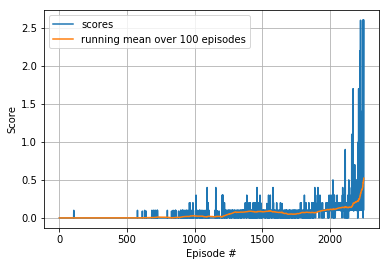

In [10]:



%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='scores')
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores, label='running mean over 100 episodes')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('training_scores.png', format='png', dpi=1000)
plt.show()



